In [37]:
import pandas as pd
import numpy as np


In [38]:
df=pd.read_csv('C:\\Users\\admin\\Downloads\\archive (5)\\Iris.csv')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder


In [39]:
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [40]:
df.info() #gives non null count in data set 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [41]:
df.isna().sum() #Gives no of missing values in dataset 

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [42]:
df[df['SepalLengthCm'].isnull()] #gives null values of that particular column if present

Empty DataFrame
Columns: [Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species]
Index: []

In [43]:
#X = df.iloc[:, :-1].values  #all columns except last one are stored in X variable
#Y = df.iloc[:, :5].values  #index 5 contains last column which is stored in y 

In [44]:
df = df.replace('?',np.nan) #replaces ? with NaN

In [45]:
df.fillna(df.mean(),inplace=True) #Replaces all Nan Values with its mean

C:\Users\admin\AppData\Local\Temp\ipykernel_13260\988707908.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(),inplace=True) #Replaces all Nan Values with its mean


In [46]:
df.duplicated().sum()#number of duplicate rows

0

In [47]:
df = df.drop_duplicates()#remove duplicates
print(df.duplicated().sum())

0


In [48]:
df['Species'].value_counts() #Unique values are true and false with their occurrences


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [49]:
le=LabelEncoder()


In [50]:
df.head()


Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [53]:
x=df.iloc[:,0:3]
#x = df.drop(['PetalWidthCm','PetalLengthCm'],axis=1)
y=df['Species']


In [54]:
obj=StandardScaler()
x=obj.fit_transform(x)
le.fit_transform(['Iris-setosa','Iris-versicolor','Iris-virginica'])
xtrain, xtest, ytrain, ytest=train_test_split(x,y,test_size=0.3)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)
print(knn.score(xtest,ytest))


0.9555555555555556


In [55]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
ypred=knn.predict(xtest)
confusion_matrix(ytest,ypred)



array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  2, 13]], dtype=int64)

In [56]:
k_range=range(1,26)
error1={}
errorlist=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain,ytrain)
    ypred=knn.predict(xtest)
    error1[k]=1-metrics.accuracy_score(ytest,ypred)
    errorlist.append(1-metrics.accuracy_score(ytest,ypred))

Text(0, 0.5, 'Error')

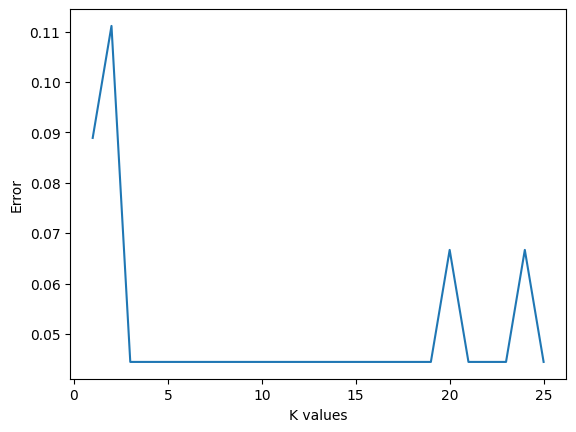

In [57]:
import matplotlib.pyplot as plt
plt.plot(k_range, errorlist)
plt.xlabel("K values")
plt.ylabel("Error")
